In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.5'

In [3]:
dd.apply_dark_theme()

In [4]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [5]:
model = dd.Model(path_to_model)

In [6]:
model.list_morphologies()

['Hay_2011_modified', 'Hay_2011', 'Hay_2011_sorted']

In [7]:
model.load_morphology('Hay_2011', sort_children=True, force=True)

Removed 1 overlapping nodes.
Converted soma to 3PS notation.
Sorted PointTree(root=Point(idx=0), num_nodes=4071).
Extended 184 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=4255).
Sorted SectionTree(root=NeuronSection(idx=0), num_nodes=195).
Sorted PointTree(root=Point(idx=0), num_nodes=4255).


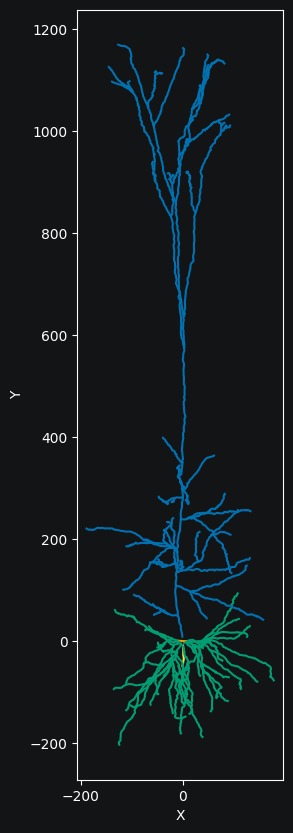

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=False,
                    show_lines=True,
                    annotate=False)

In [9]:
model.list_mechanisms()

['Im',
 'NaTa_t',
 'CaLVAst',
 'Ih',
 'SKv3_1',
 'SK_E2',
 'K_Pst',
 'CaHVA',
 'Nap_Et2',
 'K_Tst']

In [10]:
model.add_default_mechanisms(recompile=True)

In [11]:
model.add_mechanisms(recompile=True)

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Im.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/NaTa_t.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/CaLVAst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Ih.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/SKv3_1.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/SK_E2.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/K_Pst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/CaHVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/

In [12]:
model.mechanisms

{'Leak': <Mechanism(Leak)>,
 'CaDyn': <Mechanism(CaDyn)>,
 'Im': <Mechanism(Im)>,
 'NaTa_t': <Mechanism(NaTa_t)>,
 'CaLVAst': <Mechanism(CaLVAst)>,
 'Ih': <Mechanism(Ih)>,
 'SKv3_1': <Mechanism(SKv3_1)>,
 'SK_E2': <Mechanism(SK_E2)>,
 'K_Pst': <Mechanism(K_Pst)>,
 'CaHVA': <Mechanism(CaHVA)>,
 'Nap_Et2': <Mechanism(Nap_Et2)>,
 'K_Tst': <Mechanism(K_Tst)>}

In [13]:
basal_sections = model.get_sections(lambda sec: sec.domain == 'dend')
len(basal_sections)

84

In [14]:
model.define_domain('basal', basal_sections)

(model.py, line 384)
(model.py, line 409)


In [15]:
model.export_morphology('Hay_2011_modified')

Removed 184 overlapping nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=4071).
Extended 184 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=4255).


In [16]:
for domain_name in model.domains:
    if domain_name == 'axon':
        model.insert_mechanism('Leak', 'axon', distribute=False)
        continue
    elif domain_name == 'basal':
        model.insert_mechanism('Leak', 'basal', distribute=False)
        model.insert_mechanism('Ih', 'basal', distribute=False)
        continue
    for mech_name in model.mechanisms:
        model.insert_mechanism(mech_name, domain_name, distribute=False)

In [17]:
model.domains_to_mechs

{'apic': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'Im',
  'K_Pst',
  'K_Tst',
  'Leak',
  'NaTa_t',
  'Nap_Et2',
  'SK_E2',
  'SKv3_1'},
 'axon': {'Leak'},
 'soma': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'Im',
  'K_Pst',
  'K_Tst',
  'Leak',
  'NaTa_t',
  'Nap_Et2',
  'SK_E2',
  'SKv3_1'},
 'basal': {'Ih', 'Leak'}}

In [18]:
model.groups

{'all': SegmentGroup("all", domains=['apic', 'axon', 'soma', 'basal']),
 'apical': SegmentGroup("apical", domains=['apic']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'basal': SegmentGroup("basal", domains=['basal'])}

In [19]:
model.set_param('cm', group_name='basal', value=2)
model.set_param('cm', group_name='apical', value=2)
model.set_param('cm', group_name='somatic', value=1)
model.set_param('cm', group_name='axonal', value=1)
model.set_param('Ra', value=100)

In [20]:
model.set_segmentation(d_lambda=0.1)

In [21]:
len(model.seg_tree)

1011

In [22]:
# Leak
model.set_param('gbar_Leak',  group_name='somatic', value=0.0000338)
model.set_param('gbar_Leak', group_name='axonal', value=0.0000325)
model.set_param('gbar_Leak', group_name='basal', value=0.0000467)
model.set_param('gbar_Leak', group_name='apical', value=0.0000589)



# Sodium
model.set_param('gbar_Nap_Et2', group_name='somatic',value=0.00172)

model.set_param('gbar_NaTa_t', group_name='somatic', value=2.04)
model.set_param('gbar_NaTa_t', group_name='apical', value=0.0213)

# Potassium
model.set_param('gbar_K_Pst', group_name='somatic', value=0.00223)

model.set_param('gbar_K_Tst', group_name='somatic', value=0.0812)

model.set_param('gbar_SKv3_1', group_name='somatic', value=0.693)
model.set_param('gbar_SKv3_1', group_name='apical', value=0.000261)

model.set_param('gbar_SK_E2', group_name='somatic', value=0.0441)
model.set_param('gbar_SK_E2', group_name='apical', value=0.0012)

model.set_param('gbar_Im', group_name='apical', value=0.0000675)

# Calcium
model.set_param('gbar_CaLVAst', group_name='somatic', value=0.00343)
model.set_param('gbar_CaLVAst', group_name='apical', distr_type='step',
                max_value=1*0.0187, min_value=0.01*0.0187, start=685, end=885)

model.set_param('gbar_CaHVA', group_name='somatic', value=0.000992)
model.set_param('gbar_CaHVA', group_name='apical', distr_type='step',
                max_value=1*0.000555, min_value=0.1*0.000555, start=685, end=885) 

# Non-specific cation
model.set_param('gbar_Ih', group_name='somatic', value=0.0002)
model.set_param('gbar_Ih', group_name='basal', value=0.0002)
model.set_param('gbar_Ih', group_name='apical', distr_type='exponential',
                vertical_shift=-0.000174, scale_factor=0.0004,
                growth_rate=0.0028, horizontal_shift=-0.398)


In [23]:
model.set_param('depth_CaDyn', value=0.1)

model.set_param('taur_CaDyn', group_name='somatic', value=460)
model.set_param('taur_CaDyn', group_name='apical', value=122)

model.set_param('cainf_CaDyn', value=1e-4)

model.set_param('gamma_CaDyn', group_name='somatic', value=0.000501)
model.set_param('gamma_CaDyn', group_name='apical', value=0.000509)

model.set_param('kt_CaDyn', value=0)
model.set_param('kd_CaDyn', value=0)

In [24]:
model.set_param('e_Leak', value=-90)
if 'ena' in model.params:
    model.set_param('ena', value=50)
if 'ek' in model.params:
    model.set_param('ek', value=-85)
if 'eca' in model.params:
    model.set_param('eca', value=132)

model.set_param('temperature', value=37)
model.set_param('v_init', value=-80)

In [25]:
model.distribute_all()

In [26]:
model.export_biophys('Hay_2011_full')

In [27]:
# for param_name in model.conductances:
#     fig, ax = plt.subplots(figsize=(10, 2))
#     model.plot_param(param_name, ax=ax)

## Simulation

In [28]:
soma = model.sec_tree.soma

In [29]:
from dendrotweaks.analysis import detect_somatic_spikes, plot_somatic_spikes
from dendrotweaks.analysis import plot_passive_properties, calculate_passive_properties
from dendrotweaks.analysis import calculate_sag_ratio

### Sag ratio

In [30]:
model.add_recording(soma, loc=0.5, var='v')
model.add_iclamp(soma, loc=0.5, amp=-0.5, delay=200, dur=500)

Recording added to sec NeuronSection(idx=0) at loc 0.5.
IClamp added to sec NeuronSection(idx=0) at loc 0.5.


In [31]:
model.simulator.run(1000); #ms

Sag ratio: 5.54/21.13 = 0.26


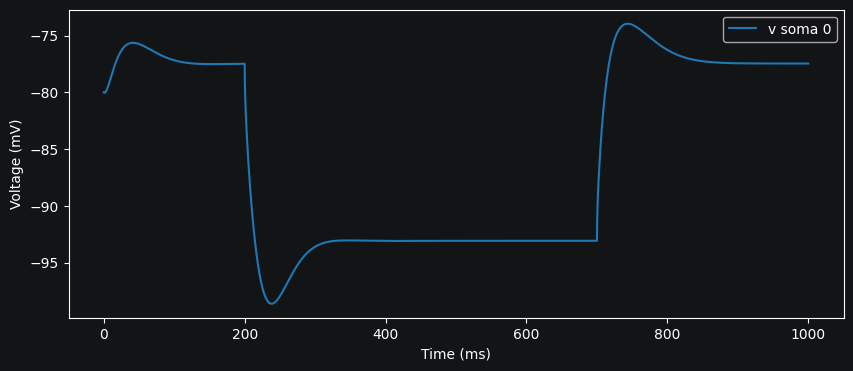

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))
model.simulator.plot_var(var='v', ax=ax)
data = calculate_sag_ratio(model)

### Somatic spikes

In [33]:
model.remove_all_stimuli()
model.remove_all_recordings()

model.add_recording(soma, loc=0.5)
model.add_iclamp(soma, loc=0.5, amp=0.793, delay=100, dur=800)

Recording added to sec NeuronSection(idx=0) at loc 0.5.
IClamp added to sec NeuronSection(idx=0) at loc 0.5.


Detected 11 spikes
Average spike half-width: 0.70 ms
Average spike amplitude: 81.55 mV
Spike frequency: 13.75 Hz


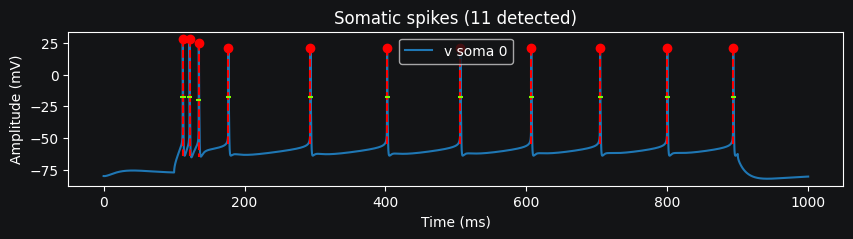

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
model.simulator.run(1000);
model.simulator.plot_voltage(ax=ax)
spike_data = detect_somatic_spikes(model)
plot_somatic_spikes(spike_data, ax, show_metrics=True)

In [35]:
model.export_stimuli(file_name='depolarizing_current')

In [36]:
model.export_to_NEURON(file_name='Hay_2011_NEURON', include_kinetic_params=True)

### Blocking Ih

In [37]:
model.set_param('gbar_Ih', group_name='somatic', value=0.0)
model.set_param('gbar_Ih', group_name='basal', value=0.0)
model.set_param('gbar_Ih', group_name='apical', value=0.0)
model.set_param('v_init', value=-90)

In [38]:
model.remove_all_stimuli()
model.remove_all_recordings()

model.add_recording(soma, loc=0.5)
model.add_iclamp(soma, loc=0.5, amp=-0.05, delay=200, dur=500)

Recording added to sec NeuronSection(idx=0) at loc 0.5.
IClamp added to sec NeuronSection(idx=0) at loc 0.5.


In [39]:
model.simulator.run(1000); #ms

Input resistance: -73.73 MOhm
Time constant 33.60 ms. Estimated from double exp fit (slowest component)


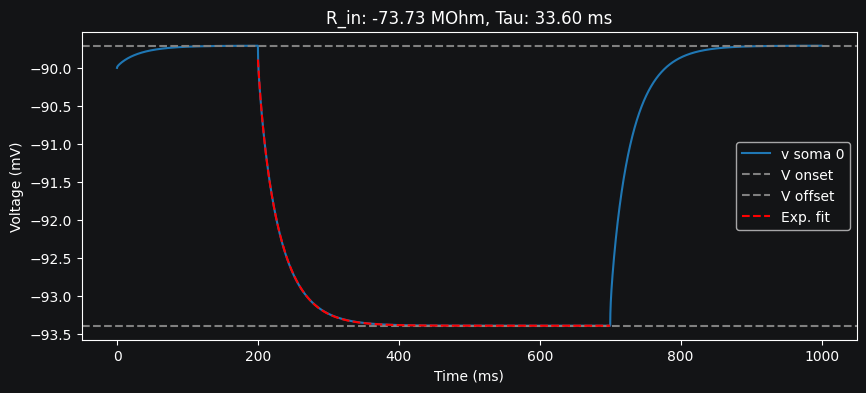

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
model.simulator.plot_var(var='v', ax=ax)
data = calculate_passive_properties(model)
plot_passive_properties(data, ax=ax)